In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dfx=pd.read_csv(r"C:\Users\Bharath Chandra\Downloads\Linear_X_Train.csv")
dfy=pd.read_csv(r"C:\Users\Bharath Chandra\Downloads\Linear_Y_Train.csv")
x= dfx.values
y=dfy.values
print(x.shape)
print(y.shape)
x=x.reshape((-1,))
y=y.reshape((-1,))
print(x.shape)
print(y.shape)
print(x)
print(y)

(3750, 1)
(3750, 1)
(3750,)
(3750,)
[-0.28930742 -0.58880963  1.02750749 ... -0.30516366  1.67583291
 -0.49175724]
[-9.11011171e-02 -5.34677208e+01  7.54570088e+01 ... -3.49832749e+01
  1.45206092e+02 -1.71244939e+01]


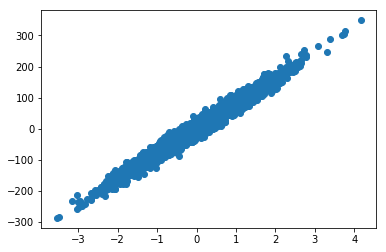

In [12]:
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)
plt.show()

In [33]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
    
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.0001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list


In [34]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

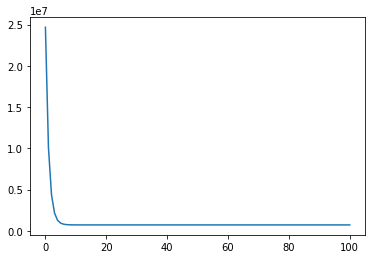

In [35]:
plt.plot(error_list)

In [41]:
dftest=pd.read_csv(r"C:\Users\Bharath Chandra\Downloads\Linear_X_Test.csv")
xtest=dftest.values
print(xtest)
xtest=xtest.reshape((-1,))
print(xtest.shape)

[[-1.87794441]
 [-0.86903192]
 [-2.53018242]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]
(1250,)


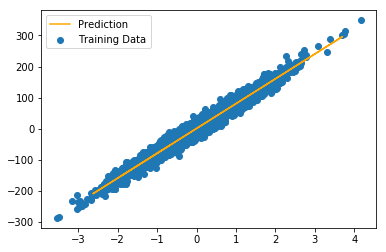

In [42]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()